<a href="https://colab.research.google.com/github/benwalkerdata/Portfolio-R-Decision-Trees/blob/main/Portfolio_Decision_Tree_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Tree Methods Project</h1>
For this project I will be exploring the use of tree methods to classify schools as private or Public based off their features.

<h2>Get the Data</h2>


In [23]:
install.packages('ISLR')
install.packages('caTools')
install.packages('rpart.plot')
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ISLR)

In [3]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [4]:
df <- College

<H2>Explore the data</h2>

In [5]:
library(ggplot2)

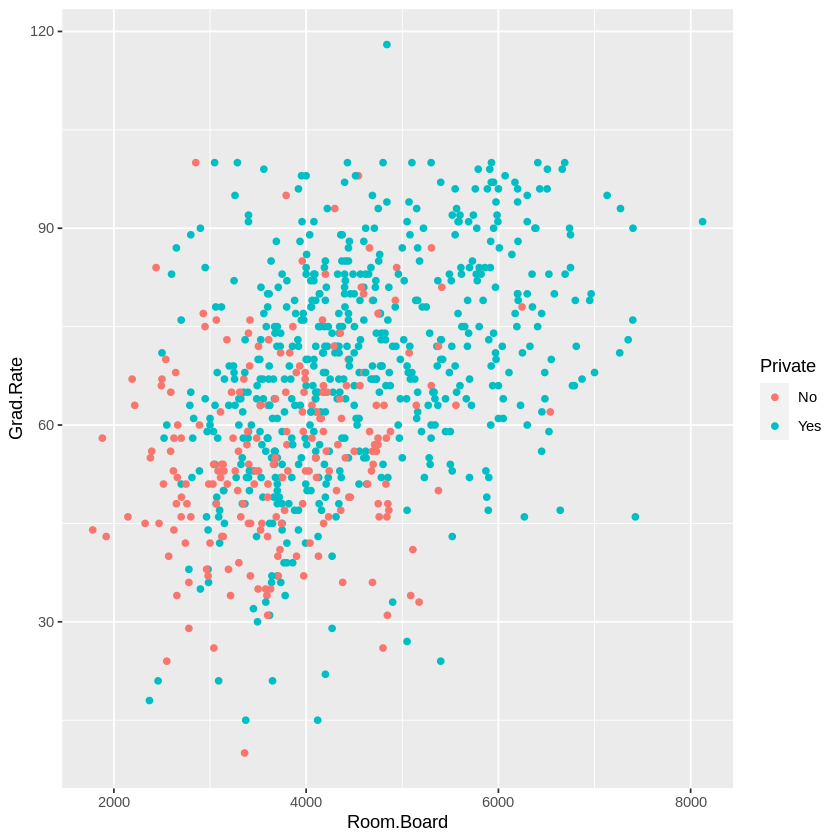

In [6]:
#Plot of Grad.Rate versus Room.Board
ggplot(df, aes(Room.Board,Grad.Rate)) + geom_point(aes(color=Private))

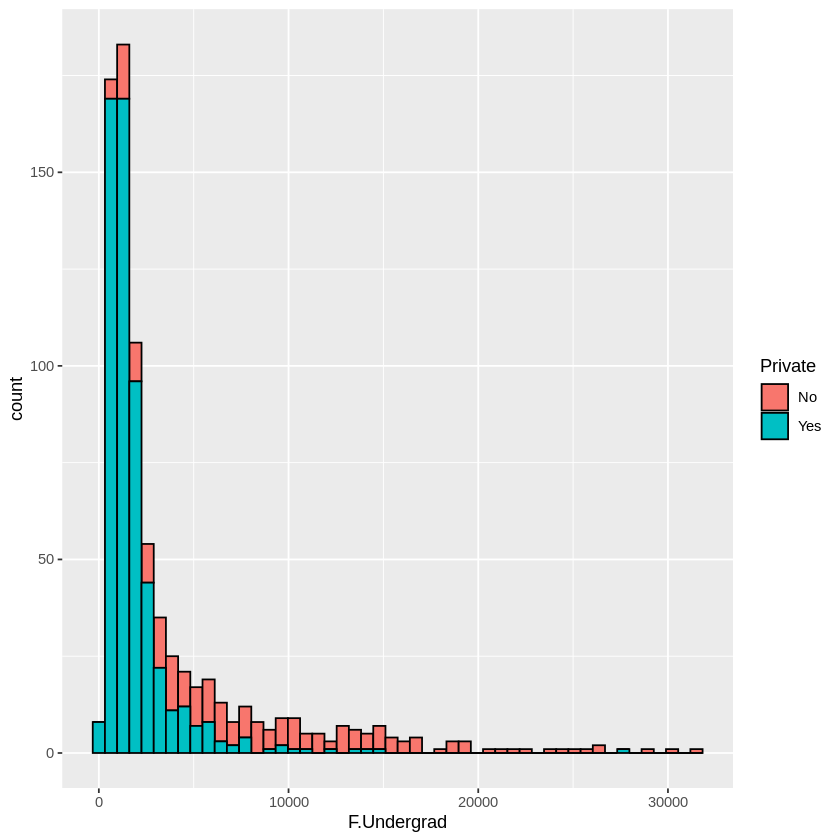

In [7]:
#Plot Undergrad students by Private
ggplot(df,aes(F.Undergrad)) + geom_histogram(aes(fill=Private),color='black', bins=50)

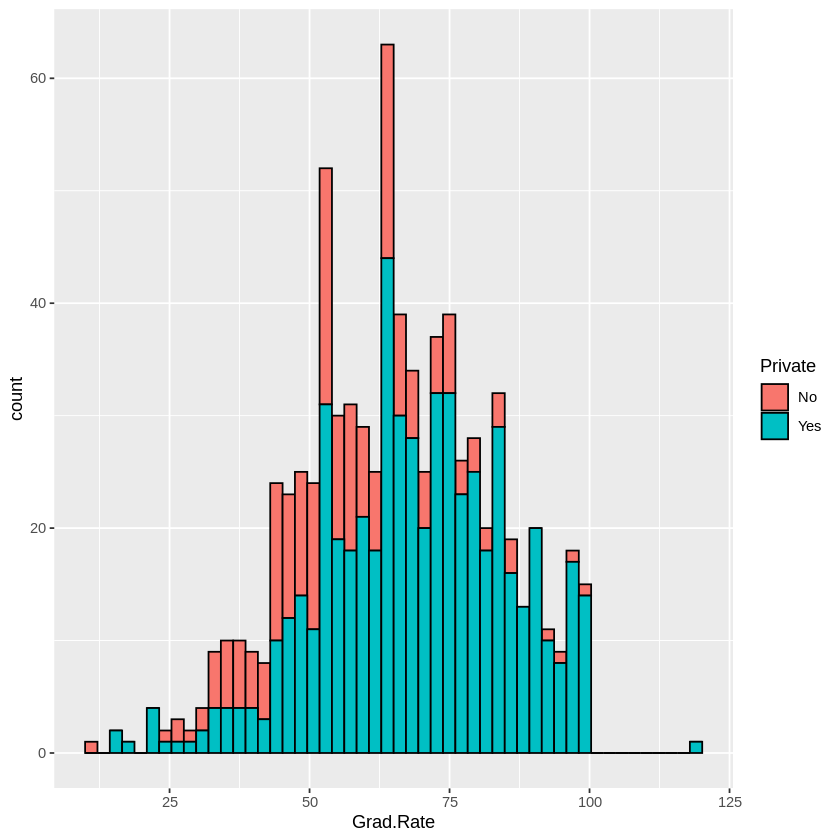

In [8]:
#Plot of Grad.Rate by Private
ggplot(df,aes(Grad.Rate)) + geom_histogram(aes(fill=Private),color='black',bins=50)

In [9]:
#What colleage had a Graduation Rate of above 100%?
subset(df,Grad.Rate > 100)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [10]:
#I'll change the Grad.Rate to 100% for Cazenovia College
df['Cazenovia College','Grad.Rate'] <- 100

<h2>Train Test Split</h2>
I'll split the dataset into training and testing sets 70/30.

In [11]:
library(caTools)

set.seed(101)

sample = sample.split(df$Private, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

<h2>Decision Tree</h2>
I'll use the rpart library to build a decision tree to predict whether or not a school is Private

In [12]:
library(rpart)

In [13]:
tree <- rpart(Private ~.,method='class',data = train)

In [14]:
tree.preds <- predict(tree,test)

In [15]:
head(tree.preds)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


I'll turn these two columns into one column to match the original Yes/No Label for a Private column.

In [16]:
tree.preds <- as.data.frame(tree.preds)
joiner <- function(x){
    if (x>=0.5){
        return('Yes')
    }else{
        return("No")
    }
}

In [17]:
tree.preds$Private <- sapply(tree.preds$Yes,joiner)

In [18]:
head(tree.preds)

,No,Yes,Private
,<dbl>,<dbl>,<chr>
Adrian College,0.003311258,0.9966887,Yes
Alfred University,0.003311258,0.9966887,Yes
Allegheny College,0.003311258,0.9966887,Yes
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887,Yes
Alma College,0.003311258,0.9966887,Yes
Amherst College,0.003311258,0.9966887,Yes


In [19]:
#Confusion matrix
table(tree.preds$Private,test$Private)

     
       No Yes
  No   57   9
  Yes   7 160

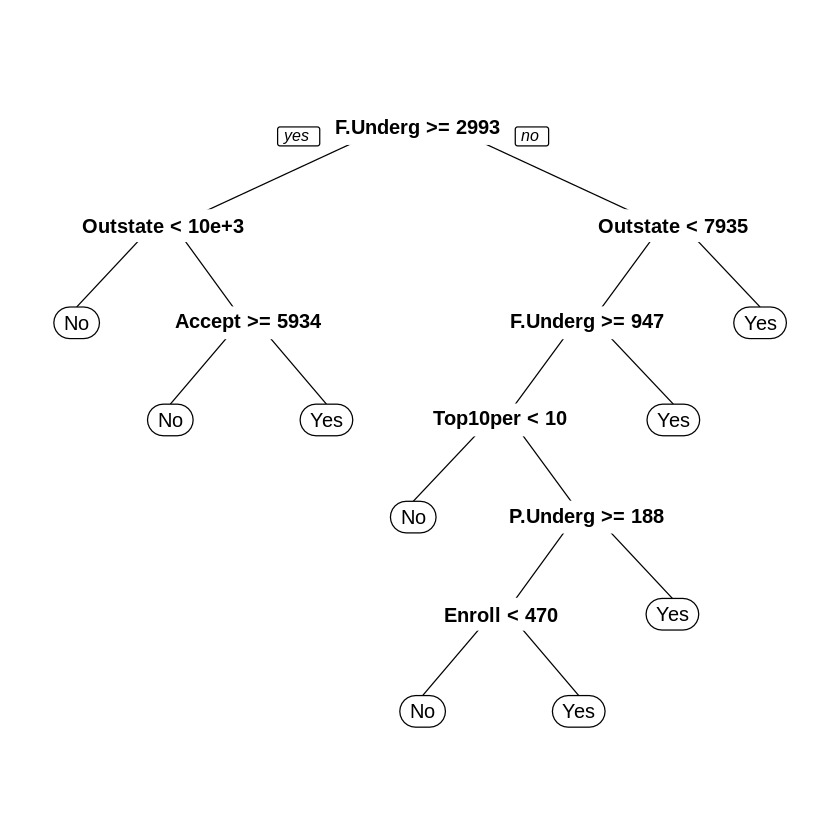

In [22]:
#plot the tree model
library(rpart.plot)
prp(tree)

<h2>Random Forest</h2>
Now I'll build out a random forest model

In [24]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [26]:
#Build out a model to predict the private class
rf.model <- randomForest(Private ~ . , data = train,importance = TRUE)

In [28]:
#Confusion Matrix
rf.model$confusion

,No,Yes,class.error
No,125,23,0.15540541
Yes,10,386,0.02525253


In [29]:
#Feature importance
rf.model$importance

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.0299975940,1.581643e-02,0.0195732992,9.093474
Accept,0.0265169723,1.359972e-02,0.0169830344,11.252450
Enroll,0.0360668986,2.852824e-02,0.0305094654,22.810173
Top10perc,0.0094902570,5.700969e-03,0.0067307985,5.535670
Top25perc,0.0049996299,2.891095e-03,0.0035060616,4.568160
F.Undergrad,0.1591184093,6.945790e-02,0.0937286273,38.842710
P.Undergrad,0.0436610506,7.334280e-03,0.0170748529,16.934128
Outstate,0.1456738704,6.461743e-02,0.0865178571,42.669650
Room.Board,0.0147668601,1.439793e-02,0.0144179025,10.414502
Books,0.0007389787,8.914367e-05,0.0002868557,2.203342


<h2>Predictions</h2>

In [30]:
p <- predict(rf.model,test)

In [31]:
table(p,test$Private)

     
p      No Yes
  No   57   6
  Yes   7 163

The random forest ever so slightly more accurate than the decision tree.